In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Hyperparameter for Box-Cox transformation
TRANSFORMATION=False
LAMBDA=0.5

In [2]:
# Read the csv files using pandas
columns = ['animal_name','hair','feathers','eggs','milk','airborne','aquatic',
          'predator','toothed','backbone','breathes','venomous','fins','legs','tail',
          'domestic','catsize','type']
data_pd=pd.read_csv('zoo.data', sep=',',names=columns)

In [3]:
# Convert the data to numpy
data=data_pd.to_numpy()

In [4]:
# The first column is removed as it only contains the names
data_numeric=data[:,1:]
# The last column is removed as it only contains the labels
data_numeric=data_numeric[:,:-1]
labels=data[:,-1]

In [5]:
raw_data=data_numeric.astype(float)
if TRANSFORMATION:
    # As Box Cox works solely on positive values all the zero 
    # values are increase just a little bit to make them positive
    dim1,dim2=raw_data.shape
    for j in range(dim2):
        for i in range(dim1):
            if raw_data[i,j]<=0:
                raw_data[i,j]=0.001
    # Convert the data to float
    data_nrm = stats.boxcox(raw_data.ravel(),lmbda=LAMBDA)
    data_nrm=data_nrm.reshape(data_numeric.shape)
else:
    data_nrm=raw_data

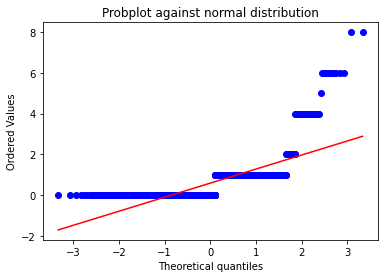

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
prob = stats.probplot(raw_data.ravel(), dist=stats.norm, plot=ax1)
ax1.set_title('Probplot against normal distribution')
plt.show()

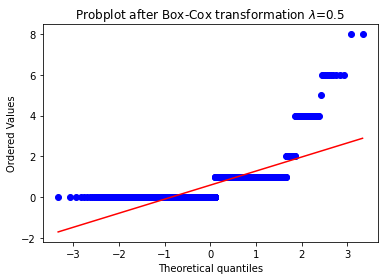

In [7]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
prob = stats.probplot(data_nrm.ravel(), dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation $\lambda$='+str(LAMBDA))
plt.show()

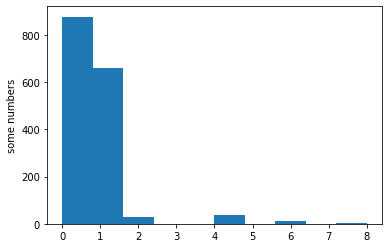

In [8]:
x=plt.hist(data_numeric.ravel())
plt.ylabel('some numbers')
plt.show()

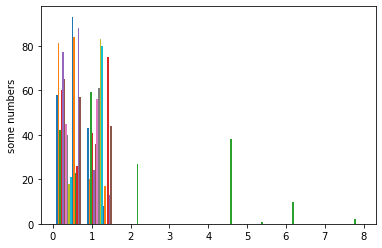

In [9]:
x=plt.hist(data_nrm)
plt.ylabel('some numbers')
plt.show()

In [10]:
#Centering the dataset
data_nrm=data_nrm.reshape(data_numeric.shape)
data_nrm_mean=data_nrm.mean(axis=0)
data_nrm-=data_nrm_mean

In [11]:
#Computation of the covariance matrix along different attributes
data_nrm=data_nrm.reshape(data_numeric.shape)
Sigma=np.matmul(data_nrm.T,data_nrm)
# Eigenvalue decomposition for the principal component analysis PCA
w_Sigma, v=np.linalg.eigh(Sigma)
# Computing the frist three principal components
pca=np.matmul(v[:,-3:].T,data_nrm.T)

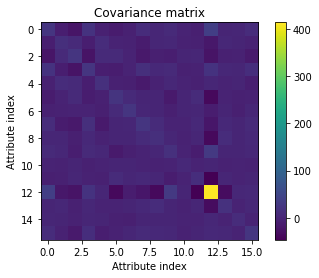

In [12]:
plt.figure()
plt.imshow(Sigma)
plt.colorbar()
plt.xlabel('Attribute index')
plt.ylabel('Attribute index')
plt.title('Covariance matrix')
plt.savefig('PCA4.png')
plt.show()

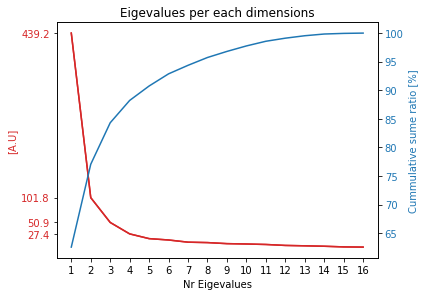

In [13]:
# Plotting the eigenvalues from the PCA
cumsum=100*np.cumsum(np.flip(w_Sigma))/w_Sigma.sum()
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Nr Eigevalues')
ax1.set_ylabel('[A.U]', color=color)
ax1.plot(np.flip(w_Sigma), color=color)
ax1.plot(np.flip(w_Sigma), color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yticks(w_Sigma[-4:])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cummulative sume ratio [%]', color=color)  # we already handled the x-label with ax1
ax2.plot(cumsum, color=color)
ax2.tick_params(axis='y', labelcolor=color)
xticks=[str(i) for i in range(1,17)]
plt.xticks(np.arange(0, 16),xticks)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Eigevalues per each dimensions')
plt.savefig('PCA1.png')
plt.show()

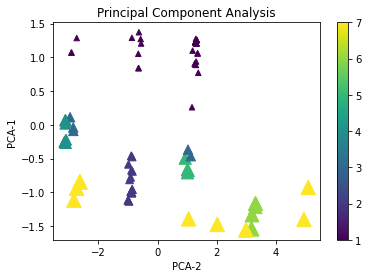

In [14]:
# Plotting the 2D embdeddings from the PCA
plt.figure()
plt.scatter(pca[2],pca[1], 
            marker='^',
            s=30*labels.astype(int),
            c=labels)
plt.xlabel('PCA-2')
plt.ylabel('PCA-1')
plt.title ('Principal Component Analysis')
plt.colorbar()
plt.savefig('PCA2.png')
plt.show()

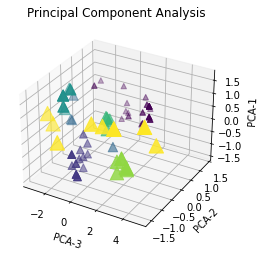

In [15]:
# Plotting the 3D embdeddings from the PCA
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca[2],
           pca[1],
           pca[0],
           marker='^', 
           s=30*labels.astype(int),
           c=labels)
ax.set_xlabel('PCA-3')
ax.set_ylabel('PCA-2')
ax.set_zlabel('PCA-1')
plt.title('Principal Component Analysis')
plt.savefig('PCA3.png')
plt.show()

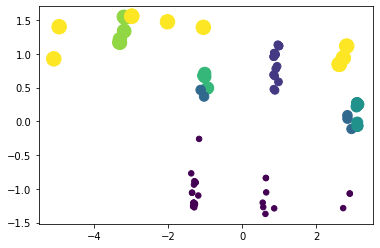

In [16]:
#Computation of the covariance matrix along individual dataset
S=np.matmul(data_nrm,data_nrm.T)
# Eigenvalue decomposition for the multidimensional scanning MDS
w_S, v_S=np.linalg.eigh(S)
reconst=np.matmul(np.diag(np.sqrt(abs(w_S))),v_S.T)
plt.scatter(reconst[-1,:],reconst[-2,:],s=30*labels.astype(int),c=labels)

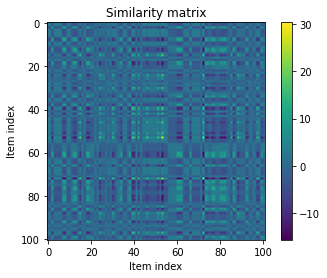

In [17]:
plt.figure()
plt.imshow(S)
plt.colorbar()
plt.xlabel('Item index')
plt.ylabel('Item index')
plt.title('Similarity matrix')
plt.savefig('MDS4.png')
plt.show()

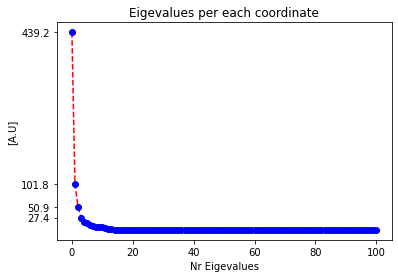

In [18]:
# Plotting the eigenvalues from the MDS
plt.figure()
plt.plot(np.flip(w_S),'r--')
plt.plot(np.flip(w_S),'bo')
plt.xlabel('Nr Eigevalues')
plt.ylabel('[A.U]')
plt.title('Eigevalues per each coordinate')
xticks=[str(i) for i in range(1,17)]
plt.yticks(w_S[-4:])
plt.savefig('MDS1.png')
plt.show()

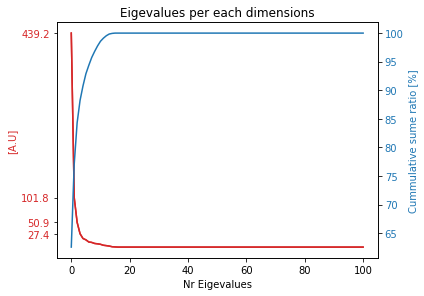

In [19]:
# Plotting the eigenvalues from the PCA
cumsum=100*np.cumsum(np.flip(w_S))/w_S.sum()
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Nr Eigevalues')
ax1.set_ylabel('[A.U]', color=color)
ax1.plot(np.flip(w_S), color=color)
ax1.plot(np.flip(w_S), color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yticks(w_Sigma[-4:])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cummulative sume ratio [%]', color=color)  # we already handled the x-label with ax1
ax2.plot(cumsum, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Eigevalues per each dimensions')
plt.savefig('MDS1.png')
plt.show()

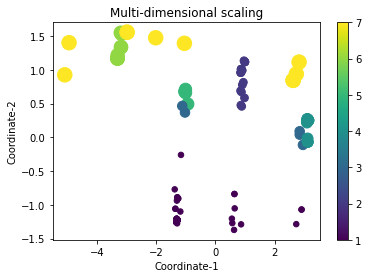

In [20]:
# Plotting the 2D embdeddings from the MDS
fig = plt.figure()
plt.scatter(np.sqrt(w_S[-1])*v_S[:,-1],
            np.sqrt(w_S[-2])*v_S[:,-2],
            marker='o',
            s=30*labels.astype(int),
            c=labels)
plt.xlabel('Coordinate-1')
plt.ylabel('Coordinate-2')
plt.title('Multi-dimensional scaling')
plt.colorbar()
plt.savefig('MDS2.png')
plt.show()

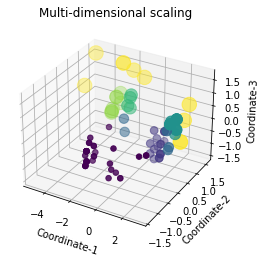

In [21]:
# Plotting the 3D embdeddings from the MDS
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
           np.sqrt(w_S[-1])*v_S[:,-1],
           np.sqrt(w_S[-2])*v_S[:,-2],
           np.sqrt(w_S[-3])*v_S[:,-3],
           marker='o', 
           s=30*labels.astype(int),
           c=labels)
ax.set_xlabel('Coordinate-1')
ax.set_ylabel('Coordinate-2')
ax.set_zlabel('Coordinate-3')
plt.title('Multi-dimensional scaling')
plt.savefig('MDS3.png')
plt.show()